In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Analyzing and Defining the Data Set

In [2]:
df = pd.read_csv("telco.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 2.Missing Data Analysis and Data Cleaning

In [5]:
# Boş string değerleri NaN olarak değiştirelim
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

print('TotalCharges kolonundaki eksik değer sayısı:', df['TotalCharges'].isnull().sum())

TotalCharges kolonundaki eksik değer sayısı: 11


In [6]:
# Eksik değer içeren satırları kaldıralım
df.dropna(inplace=True)

# Tekrar kontrol edelim
print('Eksik değerler temizlendikten sonraki satır sayısı:', len(df))

Eksik değerler temizlendikten sonraki satır sayısı: 7032


In [7]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Tekrar kontrol edelim
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

# 3.Univariate Analysis

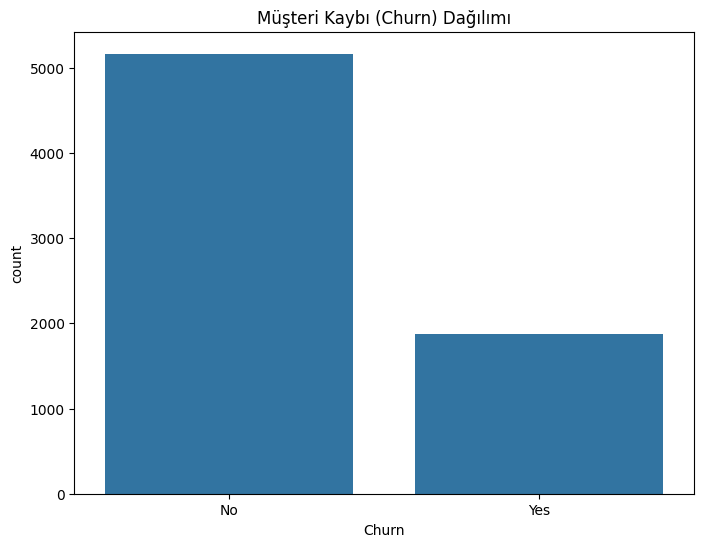

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn')
plt.title('Müşteri Kaybı (Churn) Dağılımı')
plt.show()

print(df['Churn'].value_counts(normalize=True))

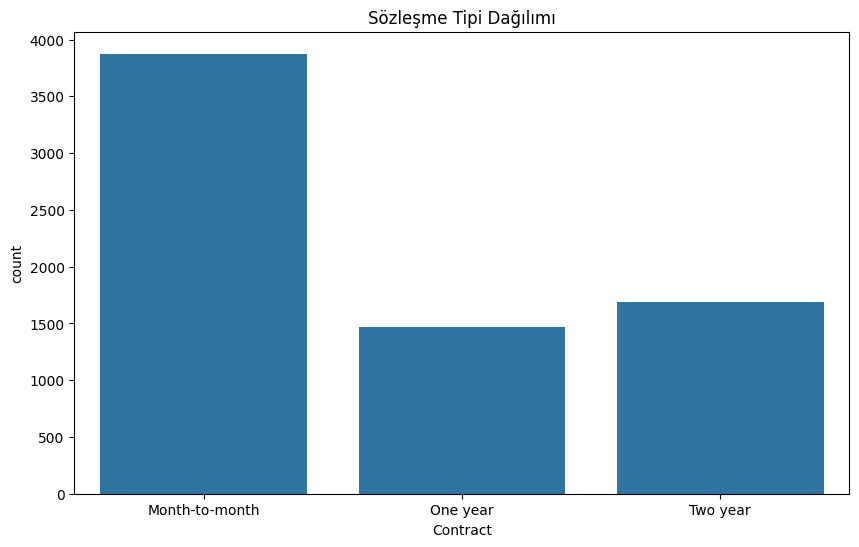

Contract
Month-to-month    0.551052
Two year          0.239619
One year          0.209329
Name: proportion, dtype: float64


In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract')
plt.title('Sözleşme Tipi Dağılımı')
plt.show()

print(df['Contract'].value_counts(normalize=True))

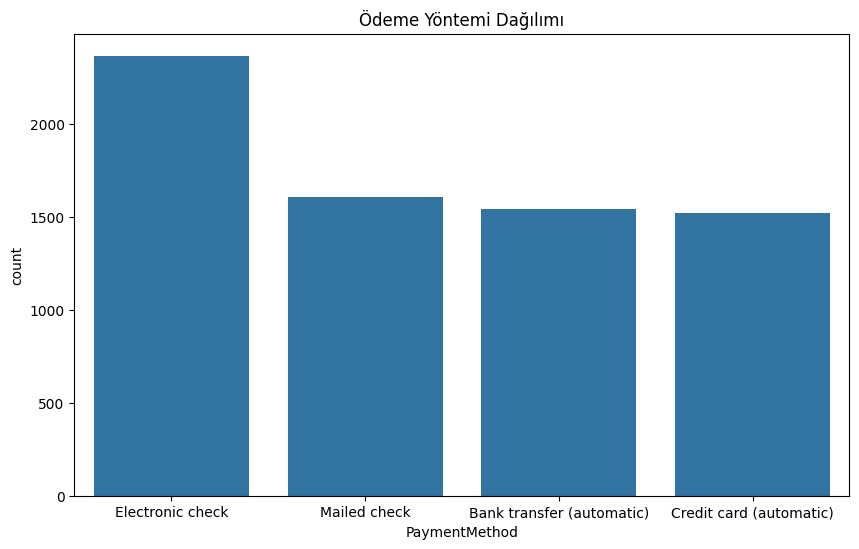

PaymentMethod
Electronic check             0.336320
Mailed check                 0.228100
Bank transfer (automatic)    0.219283
Credit card (automatic)      0.216297
Name: proportion, dtype: float64


In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod')
plt.title('Ödeme Yöntemi Dağılımı')
plt.show()

print(df['PaymentMethod'].value_counts(normalize=True))

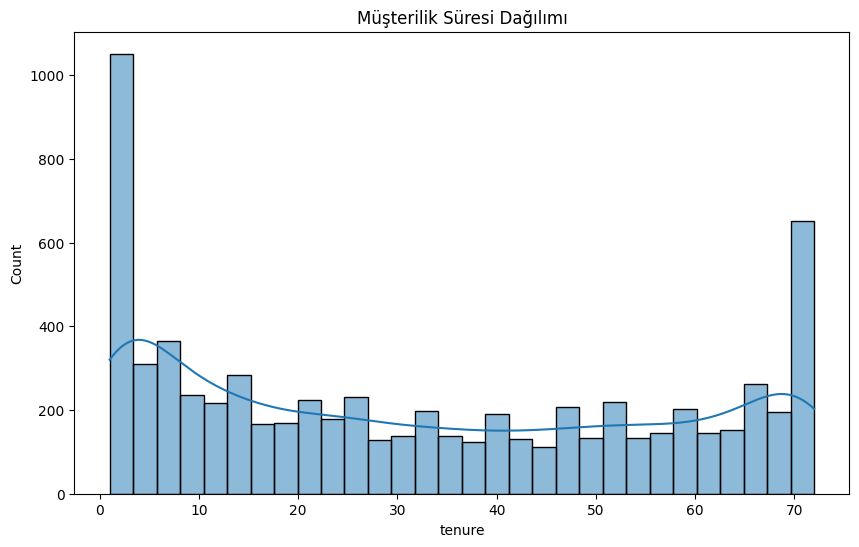

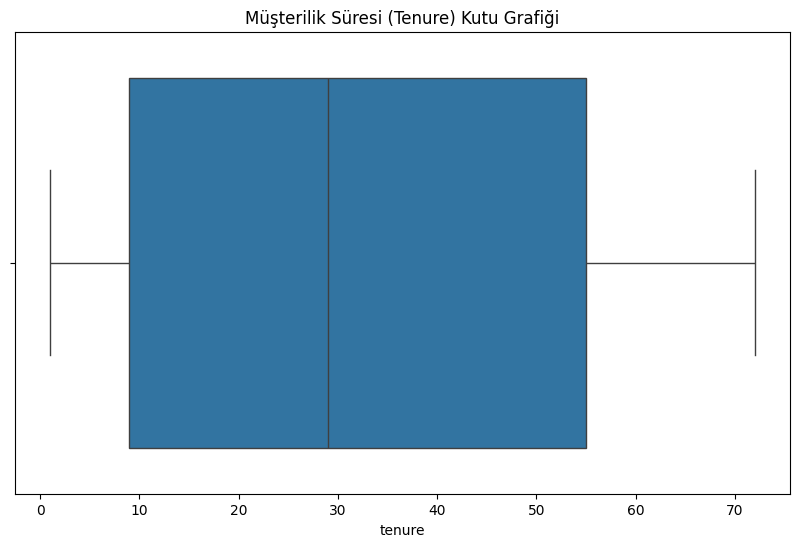

In [11]:
# Müşterilik süresi (tenure) dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', bins=30, kde=True)
plt.title('Müşterilik Süresi Dağılımı')
plt.show()

# Kutu grafiği ile aykırı değerleri inceleyelim
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='tenure')
plt.title('Müşterilik Süresi (Tenure) Kutu Grafiği')
plt.show()

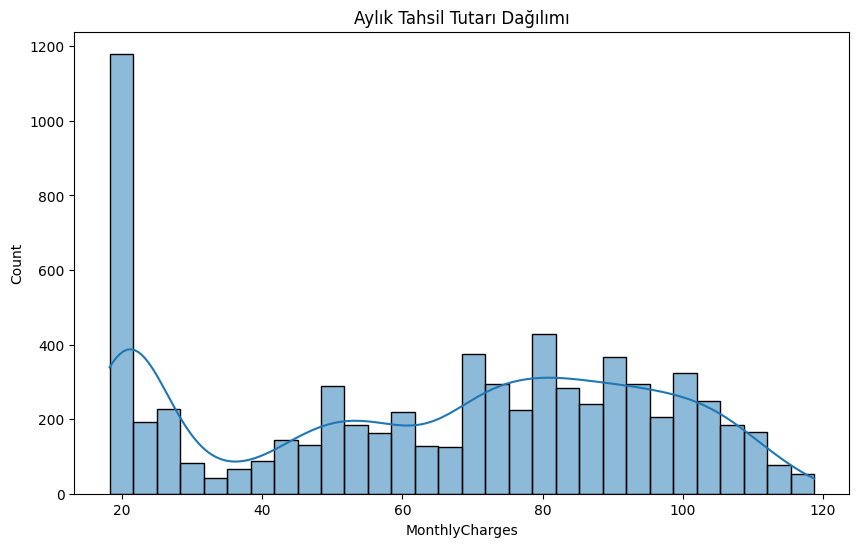

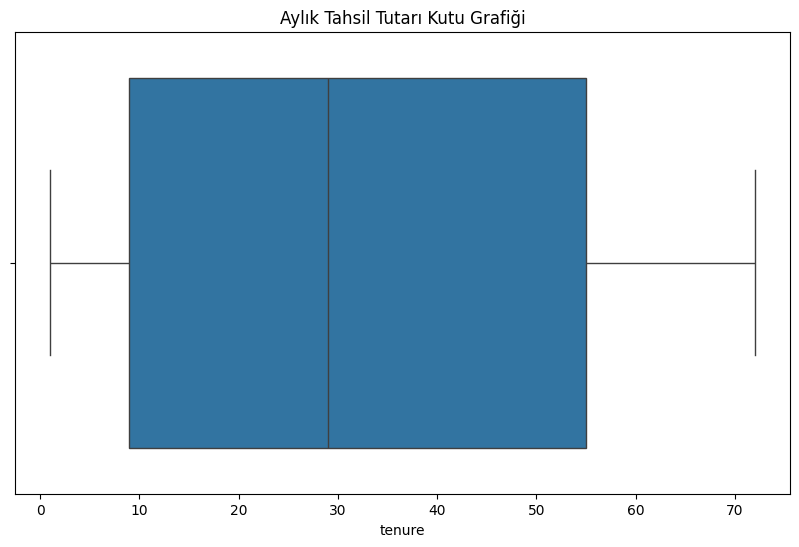

In [12]:
# Müşterilik süresi (tenure) dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', bins=30, kde=True)
plt.title('Aylık Tahsil Tutarı Dağılımı')
plt.show()

# Kutu grafiği ile aykırı değerleri inceleyelim
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='tenure')
plt.title('Aylık Tahsil Tutarı Kutu Grafiği')
plt.show()

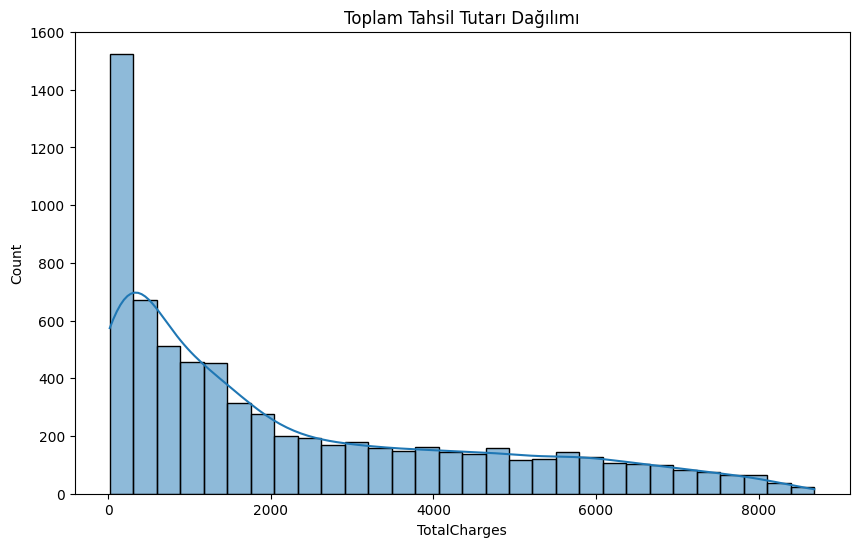

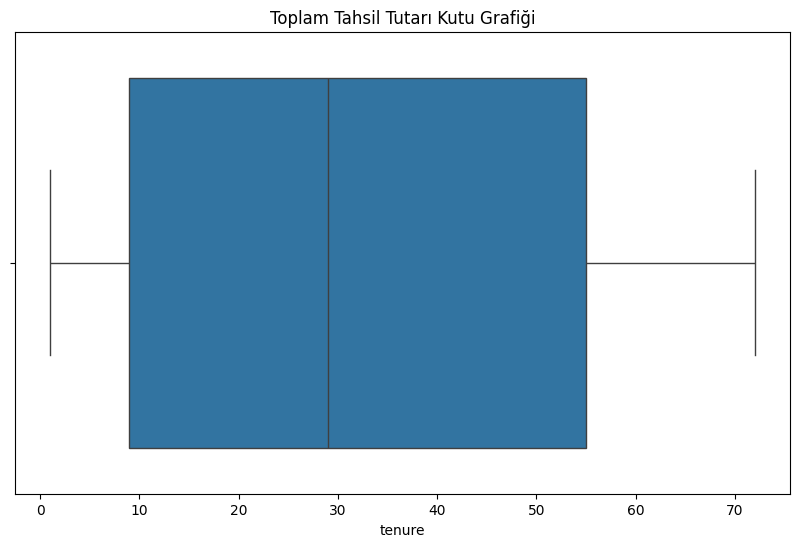

In [13]:
# Müşterilik süresi (tenure) dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalCharges', bins=30, kde=True)
plt.title('Toplam Tahsil Tutarı Dağılımı')
plt.show()

# Kutu grafiği ile aykırı değerleri inceleyelim
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='tenure')
plt.title('Toplam Tahsil Tutarı Kutu Grafiği')
plt.show()

# 4.Multivariate Analysis

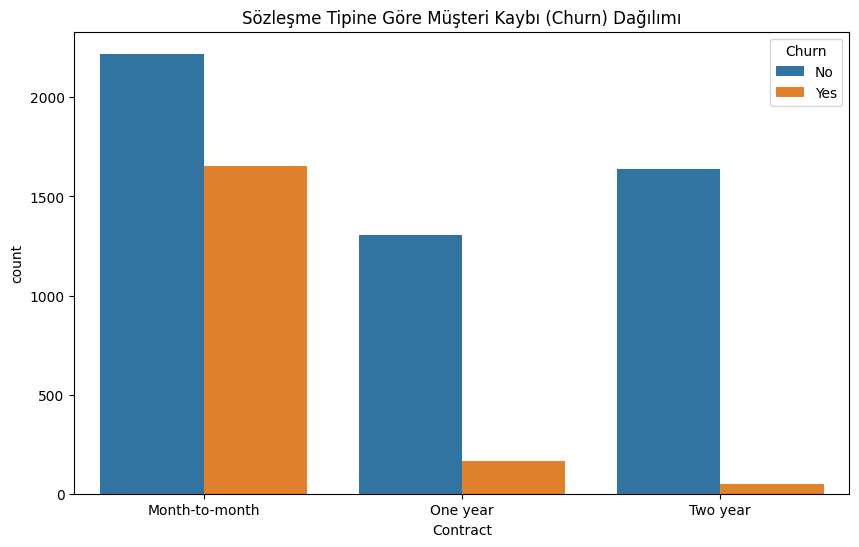

Churn,No,Yes
Contract,,
Month-to-month,0.57,0.43
One year,0.89,0.11
Two year,0.97,0.03


In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Sözleşme Tipine Göre Müşteri Kaybı (Churn) Dağılımı')
plt.show()

# Sayısal değerleri de inceleyelim
pd.crosstab(df['Contract'], df['Churn'], normalize='index').round(2)

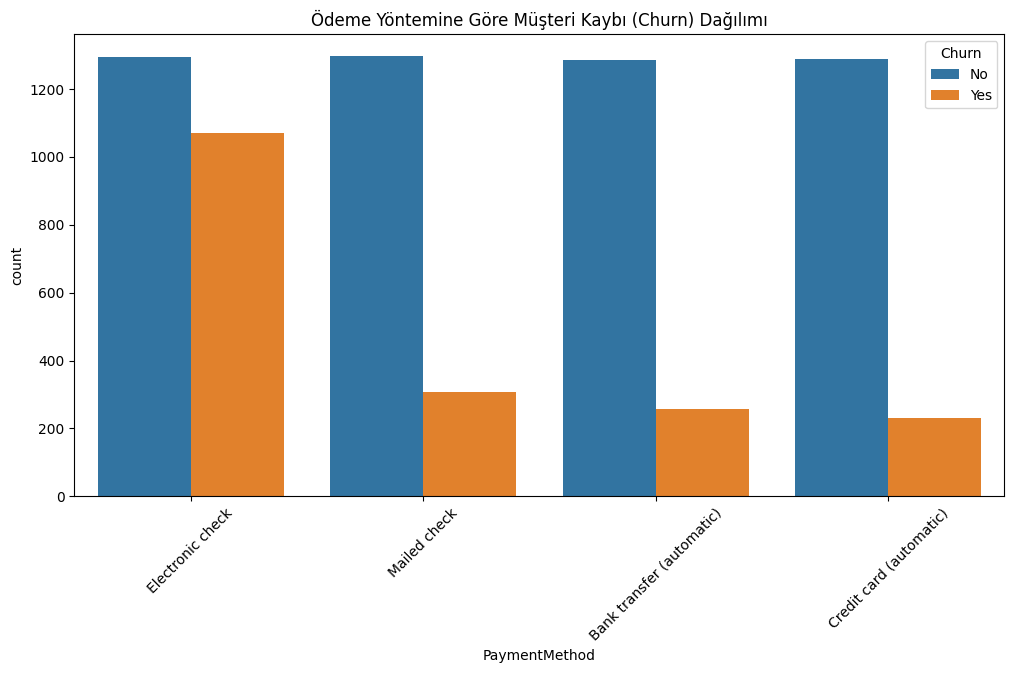

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.83,0.17
Credit card (automatic),0.85,0.15
Electronic check,0.55,0.45
Mailed check,0.81,0.19


In [15]:
# PaymentMethod ve Churn ilişkisi
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Ödeme Yöntemine Göre Müşteri Kaybı (Churn) Dağılımı')
plt.xticks(rotation=45)
plt.show()

pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index').round(2)

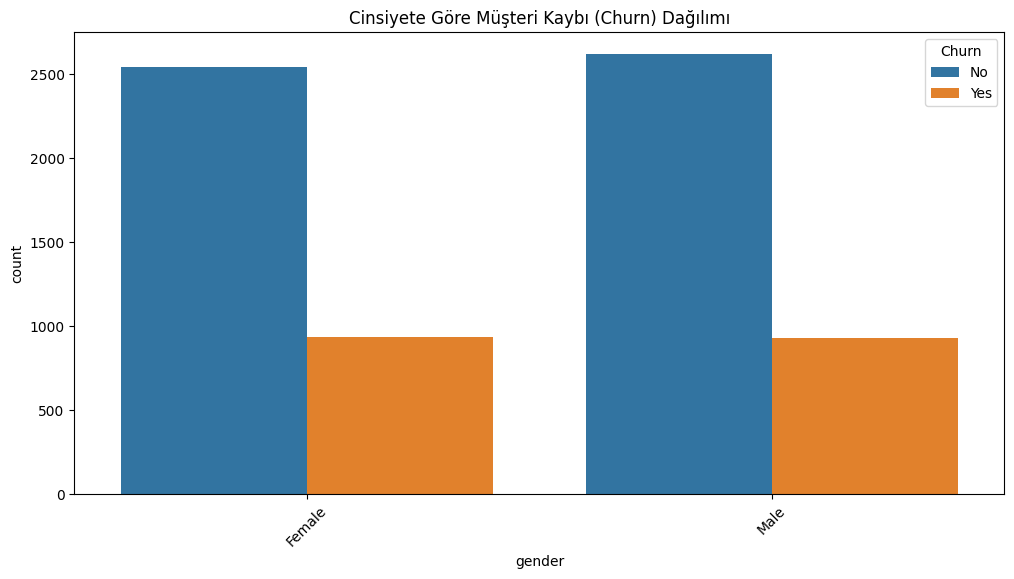

Churn,No,Yes
gender,,
Female,0.73,0.27
Male,0.74,0.26


In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Cinsiyete Göre Müşteri Kaybı (Churn) Dağılımı')
plt.xticks(rotation=45)
plt.show()

pd.crosstab(df['gender'], df['Churn'], normalize='index').round(2)

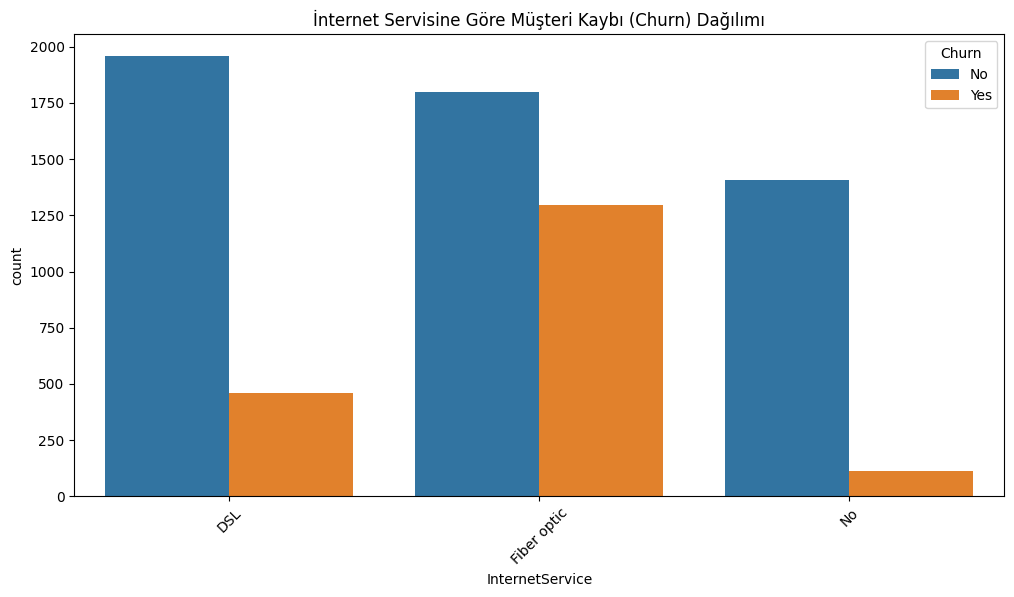

Churn,No,Yes
InternetService,,
DSL,0.81,0.19
Fiber optic,0.58,0.42
No,0.93,0.07


In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('İnternet Servisine Göre Müşteri Kaybı (Churn) Dağılımı')
plt.xticks(rotation=45)
plt.show()

pd.crosstab(df['InternetService'], df['Churn'], normalize='index').round(2)

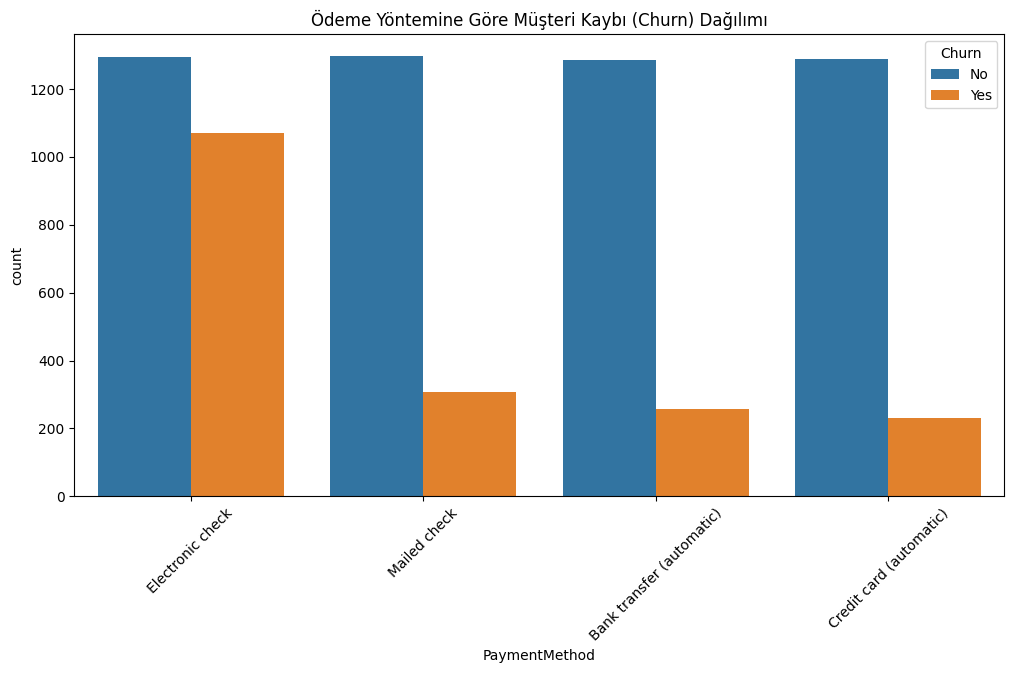

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.83,0.17
Credit card (automatic),0.85,0.15
Electronic check,0.55,0.45
Mailed check,0.81,0.19


In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Ödeme Yöntemine Göre Müşteri Kaybı (Churn) Dağılımı')
plt.xticks(rotation=45)
plt.show()

pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index').round(2)

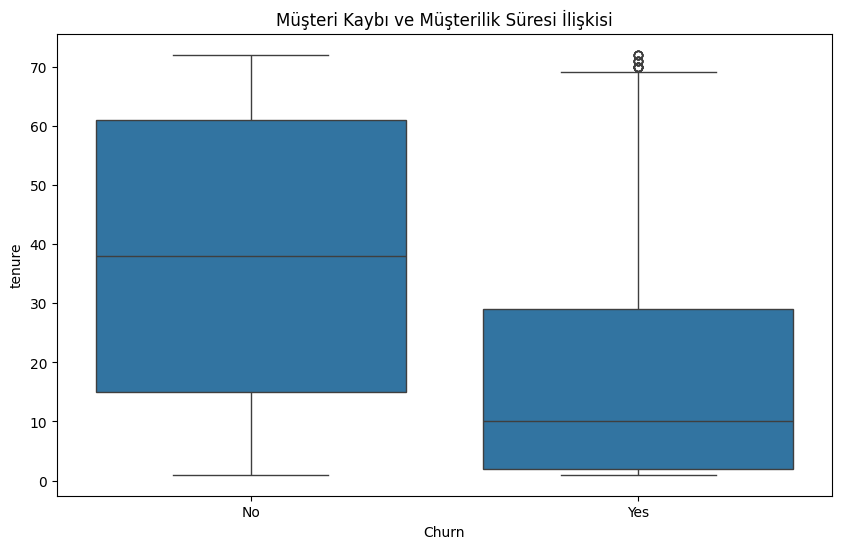

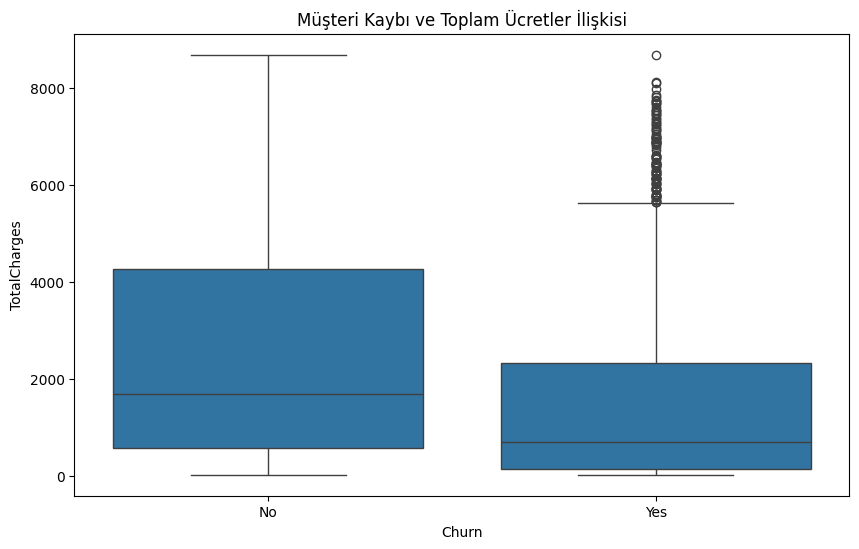

In [19]:
# Müşterilik süresi (tenure) ve Churn ilişkisi
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Müşteri Kaybı ve Müşterilik Süresi İlişkisi')
plt.show()

# TotalCharges ve Churn ilişkisi
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Müşteri Kaybı ve Toplam Ücretler İlişkisi')
plt.show()

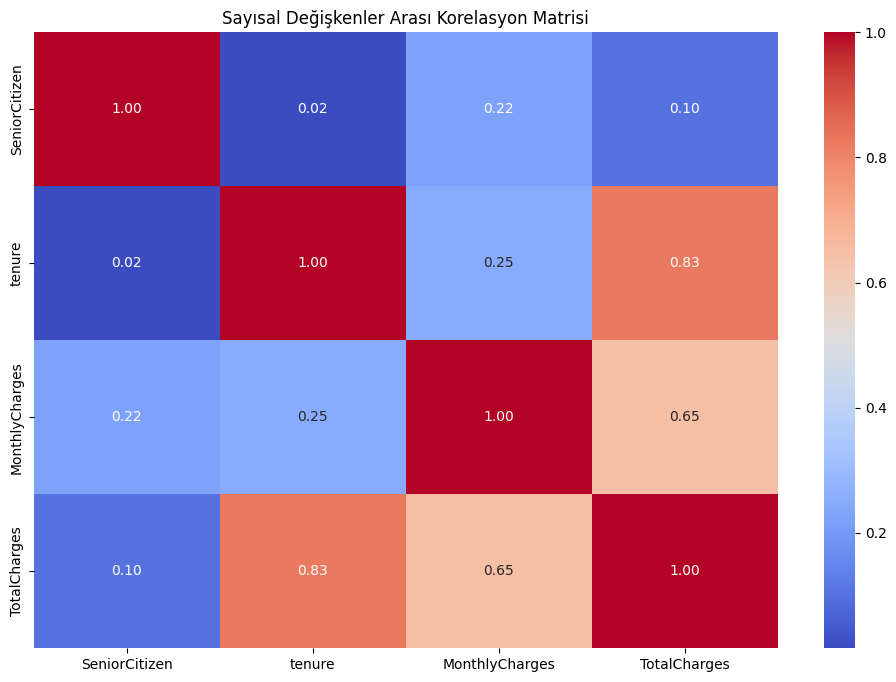

In [20]:
# Sadece sayısal kolonları seçelim
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Korelasyon matrisini oluşturalım ve ısı haritası ile görselleştirelim
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Sayısal Değişkenler Arası Korelasyon Matrisi')
plt.show()

# 5.Outlier Analysis

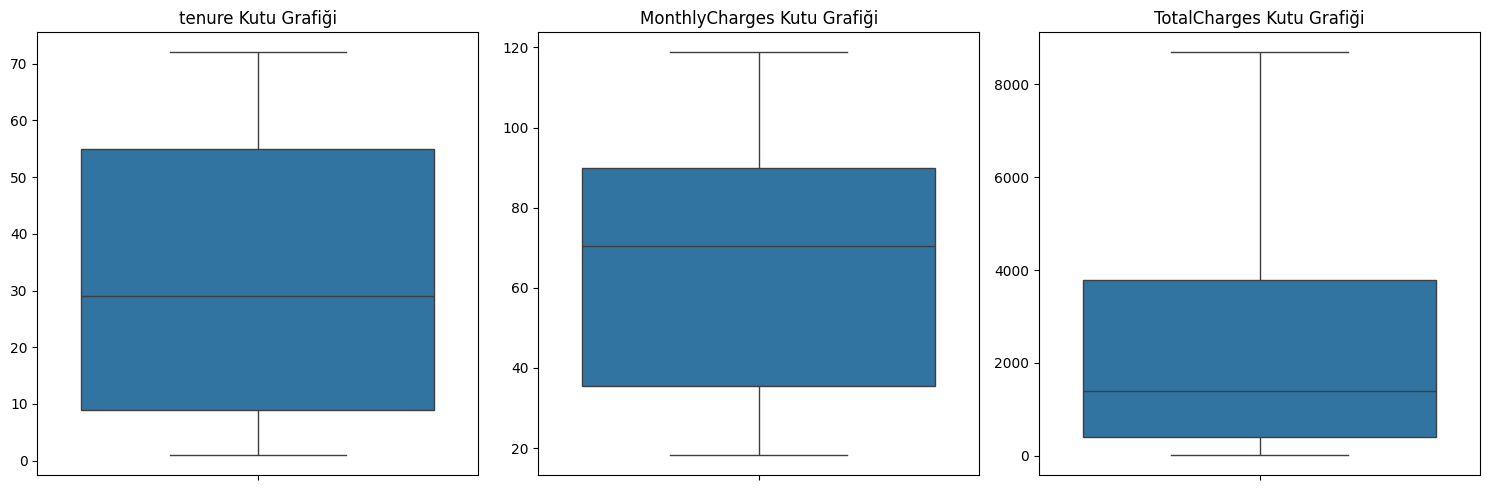

In [21]:
# Sayısal kolonları listeleyelim
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Aykırı değerleri görselleştirelim
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} Kutu Grafiği')
    plt.ylabel('')
plt.tight_layout()
plt.show()

# 6.Data Preparation Before Modeling

In [22]:
# Churn kolonunu 0 ve 1'e dönüştürelim
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

# Diğer ikili kolonları da aynı mantıkla dönüştürebiliriz
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for col in binary_cols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0})

# gender kolonunu kontrol edelim, erkek: 1, kadın: 0
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})

# Dönüşüm sonrası ilk 5 satıra göz atalım
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [23]:
# One-Hot Encoding uygulanacak kolonlar
one_hot_cols = ['Contract', 'InternetService', 'PaymentMethod']

# One-Hot Encoding işlemini uygulayalım
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# Dönüşüm sonrası ilk 5 satıra göz atalım
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,29.85,29.85,0,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,56.95,1889.50,0,True,False,False,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,53.85,108.15,1,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,42.30,1840.75,0,True,False,False,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,70.70,151.65,1,False,False,True,False,False,True,False


In [24]:
df.drop('customerID', axis=1, inplace=True)

# Son halini kontrol edelim
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Streaming

# 7.Modelling with Logistic Regression

In [25]:
from sklearn.model_selection import train_test_split

# Özellikler (X) ve hedef değişkeni (y) belirleyelim
X = df.drop('Churn', axis=1)
y = df['Churn']

# Veriyi eğitim ve test kümelerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Eğitim kümesi boyutu:', X_train.shape)
print('Test kümesi boyutu:', X_test.shape)

Eğitim kümesi boyutu: (5625, 23)
Test kümesi boyutu: (1407, 23)


In [26]:
from sklearn.linear_model import LogisticRegression

# Lojistik Regresyon modelini oluşturalım
model = LogisticRegression(max_iter=1000)

# Modeli eğitim verileriyle eğitelim
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
from sklearn.metrics import classification_report, accuracy_score

# Modeli test verileri üzerinde tahmin yapması için kullanalım
y_pred = model.predict(X_test)

# Sınıflandırma raporunu ve doğruluk skorunu yazdıralım
print('Sınıflandırma Raporu:')
print(classification_report(y_test, y_pred))
print('\nDoğruluk Skoru (Accuracy):', accuracy_score(y_test, y_pred))

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Doğruluk Skoru (Accuracy): 0.7867803837953091


# 8.Modelling With Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest modelini oluşturalım
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğitim verileriyle eğitelim
rf_model.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapalım
rf_pred = rf_model.predict(X_test)

# Sınıflandırma raporunu ve doğruluk skorunu yazdıralım
print('Random Forest Sınıflandırma Raporu:')
print(classification_report(y_test, rf_pred))
print('\nRandom Forest Doğruluk Skoru (Accuracy):', accuracy_score(y_test, rf_pred))

Random Forest Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407


Random Forest Doğruluk Skoru (Accuracy): 0.7882018479033405


# 10.Modelling with XGBoost

In [29]:
import xgboost as xgb

# XGBoost modelini oluşturalım
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Modeli eğitim verileriyle eğitelim
xgb_model.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapalım
xgb_pred = xgb_model.predict(X_test)

# Sınıflandırma raporunu ve doğruluk skorunu yazdıralım
print('XGBoost Sınıflandırma Raporu:')
print(classification_report(y_test, xgb_pred))
print('\nXGBoost Doğruluk Skoru (Accuracy):', accuracy_score(y_test, xgb_pred))

XGBoost Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1033
           1       0.57      0.49      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407


XGBoost Doğruluk Skoru (Accuracy): 0.767590618336887


c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# 11.Data Balancing with SMOTE

In [30]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# SMOTE uygulamasından önceki sınıf dağılımı
print("SMOTE öncesi sınıf dağılımı:", Counter(y_train))

# SMOTE modelini oluşturalım
smote = SMOTE(random_state=42)

# SMOTE'u eğitim verilerine uygulayalım
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SMOTE uygulamasından sonraki sınıf dağılımı
print("SMOTE sonrası sınıf dağılımı:", Counter(y_train_smote))

SMOTE öncesi sınıf dağılımı: Counter({0: 4130, 1: 1495})
SMOTE sonrası sınıf dağılımı: Counter({1: 4130, 0: 4130})


# 12.Remodeling and Performance Comparison

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Modeli oluşturalım ve dengelenmiş veri ile eğitelim
logreg_smote = LogisticRegression(max_iter=1000)
logreg_smote.fit(X_train_smote, y_train_smote)

# Test verileri üzerinde tahmin yapalım
y_pred_logreg_smote = logreg_smote.predict(X_test)

# Sonuçları yazdıralım
print("SMOTE Destekli Lojistik Regresyon Raporu:")
print(classification_report(y_test, y_pred_logreg_smote))
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred_logreg_smote))

SMOTE Destekli Lojistik Regresyon Raporu:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1033
           1       0.54      0.63      0.58       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.77      0.76      0.76      1407

Doğruluk Skoru: 0.7583511016346838


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Modeli oluşturalım ve dengelenmiş veri ile eğitelim
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# Test verileri üzerinde tahmin yapalım
y_pred_rf_smote = rf_smote.predict(X_test)

# Sonuçları yazdıralım
print("\nSMOTE Destekli Random Forest Raporu:")
print(classification_report(y_test, y_pred_rf_smote))
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred_rf_smote))


SMOTE Destekli Random Forest Raporu:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.56      0.55      0.55       374

    accuracy                           0.76      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407

Doğruluk Skoru: 0.7640369580668088


# 13.Hyperparameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Random Forest modelini oluşturalım
rf_model = RandomForestClassifier(random_state=42)

# Ayarlanacak hiperparametreler için bir sözlük oluşturalım
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV'yi oluşturalım. cv=5, 5 katlı çapraz doğrulama (cross-validation) yapar.
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=1, verbose=2, scoring='recall')

# Arama işlemini dengelenmiş eğitim verisi üzerinde başlatalım
grid_search.fit(X_train_smote, y_train_smote)

# En iyi parametreleri ve skoru yazdıralım
print("En iyi hiperparametreler:", grid_search.best_params_)
print("En iyi çapraz doğrulama (CV) skoru:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_s

In [35]:
from sklearn.metrics import classification_report, accuracy_score

# En iyi modeli alalım
best_rf_model = grid_search.best_estimator_

# Test verileri üzerinde tahmin yapalım
y_pred_tuned = best_rf_model.predict(X_test)

# Sınıflandırma raporunu yazdıralım
print("Ayarlanmış Random Forest Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_tuned))
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred_tuned))

Ayarlanmış Random Forest Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1033
           1       0.54      0.67      0.60       374

    accuracy                           0.76      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.76      0.77      1407

Doğruluk Skoru: 0.7633262260127932


#  14.Feature Importance

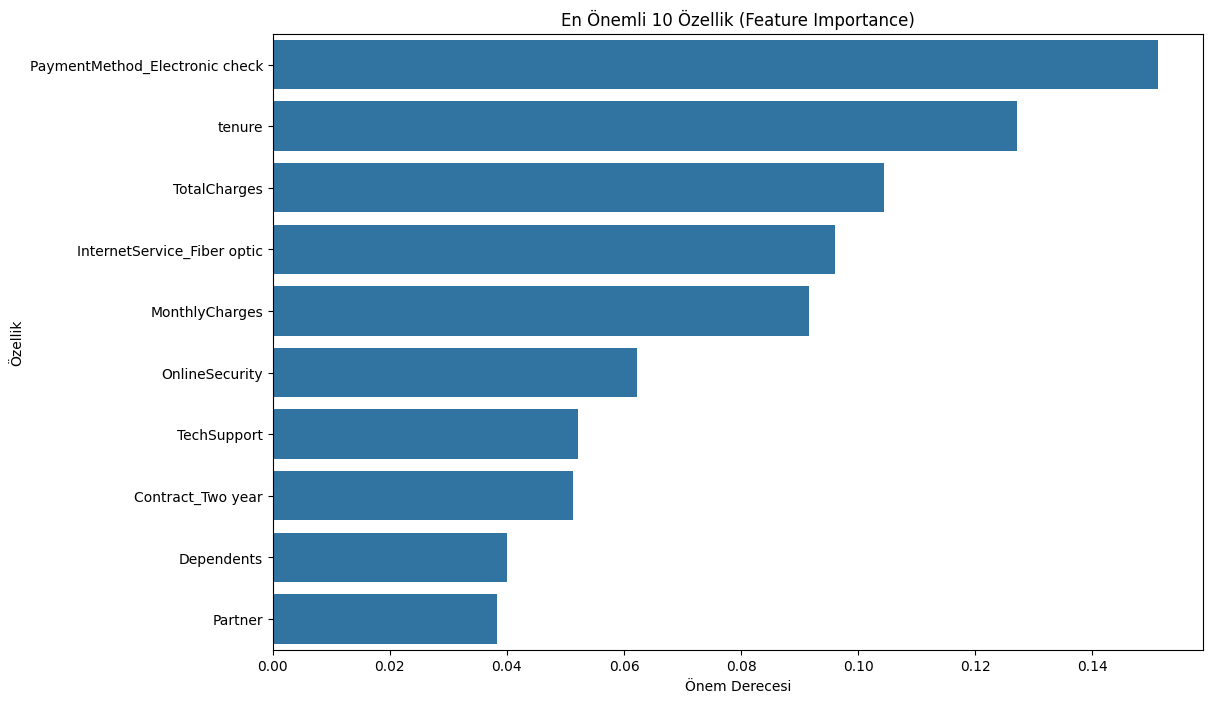

En Önemli 10 Özellik ve Önem Dereceleri:
                           feature  importance
21  PaymentMethod_Electronic check    0.151306
4                           tenure    0.127176
15                    TotalCharges    0.104378
18     InternetService_Fiber optic    0.095994
14                  MonthlyCharges    0.091611
7                   OnlineSecurity    0.062140
10                     TechSupport    0.052073
17               Contract_Two year    0.051328
3                       Dependents    0.040002
2                          Partner    0.038277


In [36]:
# Ayarlanmış Random Forest modelimizin özellik önem derecesini alalım
importances = best_rf_model.feature_importances_

# Özellik isimleriyle önem derecelerini eşleştirelim
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# En önemli 10 özelliği görselleştirelim
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('En Önemli 10 Özellik (Feature Importance)')
plt.xlabel('Önem Derecesi')
plt.ylabel('Özellik')
plt.show()

# En önemli 10 özelliği yazdıralım
print("En Önemli 10 Özellik ve Önem Dereceleri:")
print(feature_importance_df.head(10))